# Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values.

When should we use?
in MCAR

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('titanic.csv',usecols=['age','fare','survived'])

In [16]:
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
df.isnull().sum()

survived      0
age         177
fare          0
dtype: int64

In [18]:
df.isnull().mean()

survived    0.000000
age         0.198653
fare        0.000000
dtype: float64

In [19]:
#taking a random value
df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0) #we need 177 sample values

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: age, Length: 177, dtype: float64

In [20]:
df[df['age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [21]:
def impute_nan(df,variable,median):
  df[variable+"_median"]=df[variable].fillna(median)
  df[variable+"_random"]=df[variable]
  #It will have the random sample to fill the na
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  #pandas need to have same index in order to merge the dataset
  random_sample.index = df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [22]:
median = df['age'].median()

In [23]:
median

28.0

In [24]:
impute_nan(df,'age','median')

In [25]:
df.head()

,survived,age,fare,age_median,age_random
0,0,22.0,7.2500,22,22.0
1,1,38.0,71.2833,38,38.0
2,1,26.0,7.9250,26,26.0
3,1,35.0,53.1000,35,35.0
4,0,35.0,8.0500,35,35.0


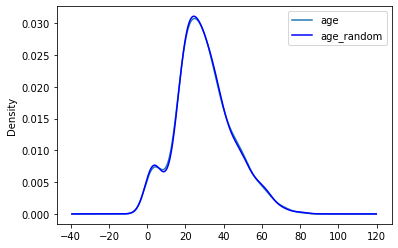

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax)
df['age_random'].plot(kind='kde',ax=ax,color='blue')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

#Advantages
1. Easy to implement
2. There is less distortion in variance

#Disadvantages
1. Every situation randomness won't work